In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns

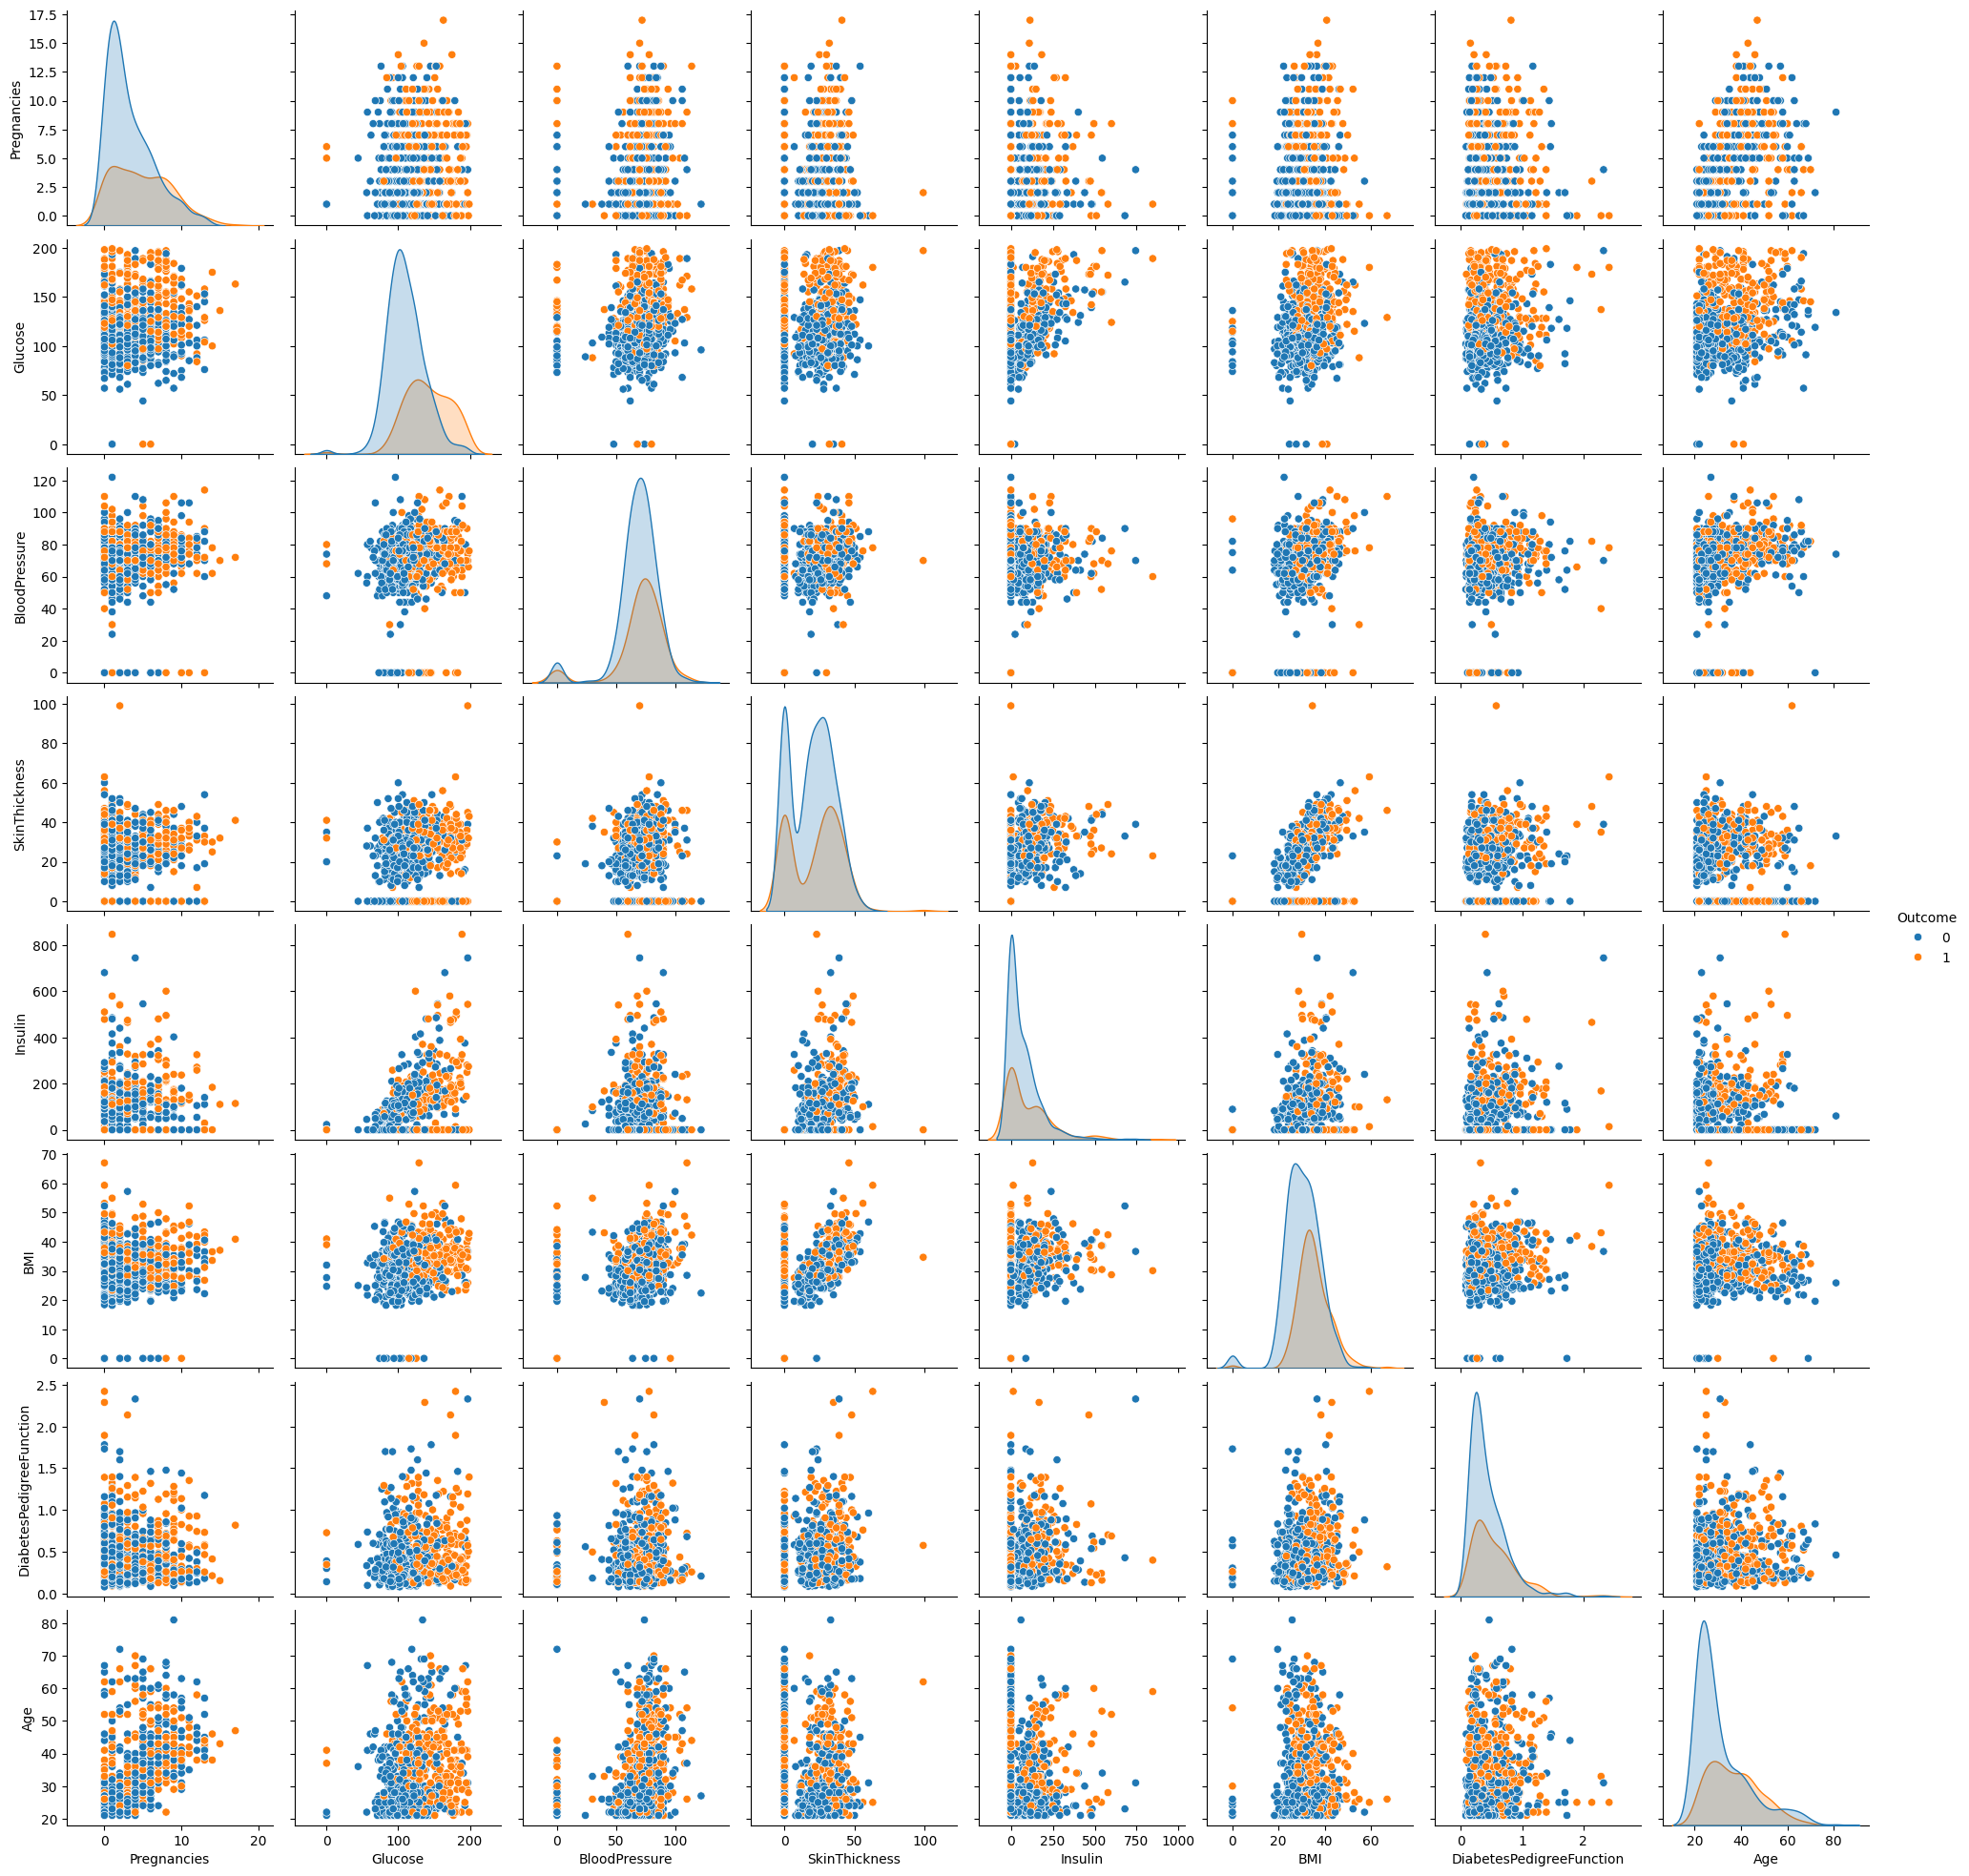

In [5]:
sns.pairplot(df,hue="Outcome")

In [6]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

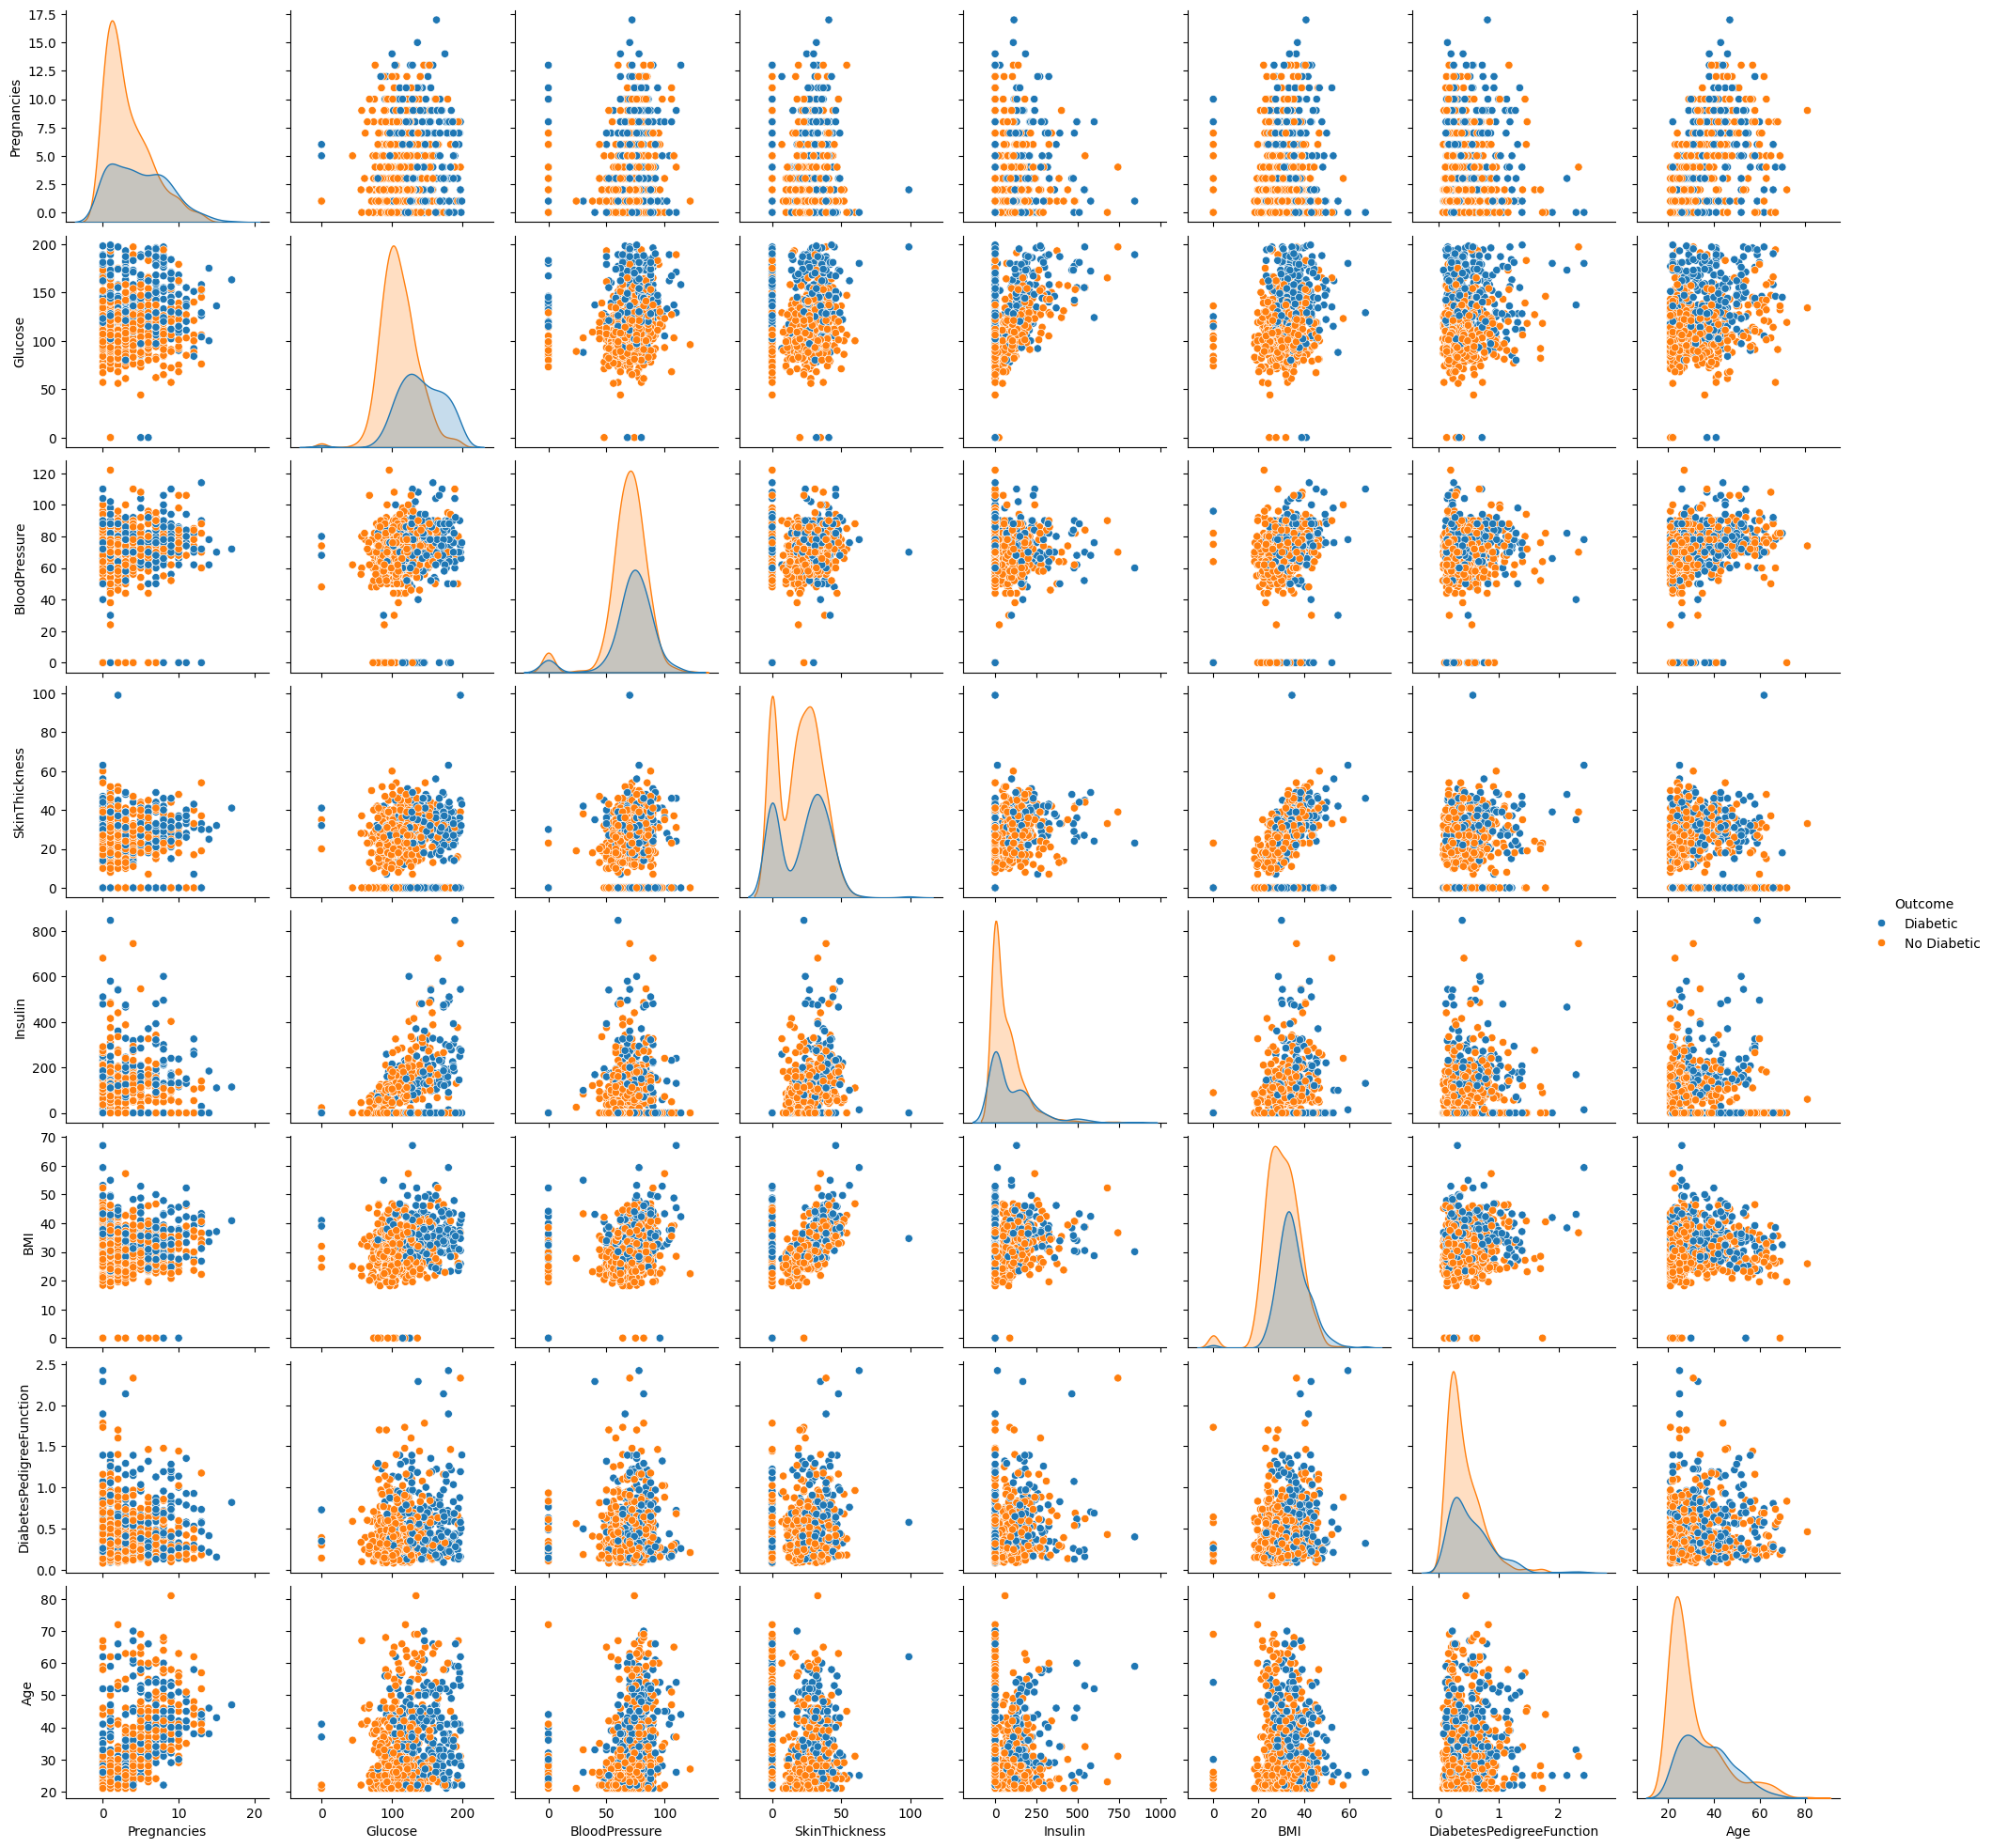

In [7]:
sns.pairplot(df,hue="Outcome")

In [8]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
from sklearn.model_selection import train_test_split

In [31]:
X=df.drop('Outcome',axis=1).values ##independent features
y=df['Outcome'].values ##dependent features

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [33]:
#### libraries from torch
import torch
import torch.nn as nn ##helps to create model
import torch.nn.functional as F

In [34]:
X_train=torch.FloatTensor(X_train) ##converting values in float

In [35]:
X_test=torch.FloatTensor(X_test)

In [36]:
y_train=torch.LongTensor(y_train)

In [37]:
y_test=torch.LongTensor(y_test)

In [38]:
df.shape

(768, 9)

In [39]:
##creating model with help of pytorch
class ANN_Model(nn.Module):
  def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
    super().__init__()
    self.f_connected1=nn.Linear(input_features,hidden1)
    self.f_connected2=nn.Linear(hidden1,hidden2)
    self.out=nn.Linear(hidden2,out_features)
  def forward(self,x):
    x=F.relu(self.f_connected1(x))
    x=F.relu(self.f_connected2(x))
    x=self.out(x)
    return x

In [40]:
## starting working in my model
torch.manual_seed(20)
model=ANN_Model()

In [41]:
model.parameters()

<generator object Module.parameters at 0x7e0264842960>

In [42]:
### Backward Propogation --Define Loss Function and optimizer

loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [44]:
epochs=500
final_losses=[]
for i in range(epochs):
  i=i+1
  y_pred=model.forward(X_train)
  loss=loss_function(y_pred,y_train)
  final_losses.append(loss)
  if i%10==1:
    print("Epoch number :{} and the loss :{}".format(i,loss.item()))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch number :1 and the loss :3.4572105407714844
Epoch number :11 and the loss :0.8019208312034607
Epoch number :21 and the loss :0.6090322136878967
Epoch number :31 and the loss :0.5917770862579346
Epoch number :41 and the loss :0.5679708123207092
Epoch number :51 and the loss :0.5529041886329651
Epoch number :61 and the loss :0.5410094857215881
Epoch number :71 and the loss :0.5310390591621399
Epoch number :81 and the loss :0.5220361351966858
Epoch number :91 and the loss :0.5135971903800964
Epoch number :101 and the loss :0.5061255097389221
Epoch number :111 and the loss :0.4983409643173218
Epoch number :121 and the loss :0.4960551857948303
Epoch number :131 and the loss :0.4828636944293976
Epoch number :141 and the loss :0.4755900204181671
Epoch number :151 and the loss :0.4819873869419098
Epoch number :161 and the loss :0.48064330220222473
Epoch number :171 and the loss :0.4706853926181793
Epoch number :181 and the loss :0.4590798020362854
Epoch number :191 and the loss :0.4508015

In [45]:
## plot the loss function

import matplotlib.pyplot as plt

In [46]:
%matplotlib inline

In [49]:
import matplotlib.pyplot as plt
import torch

In [51]:
final_losses = torch.tensor(final_losses)

In [52]:
final_losses = final_losses.detach()

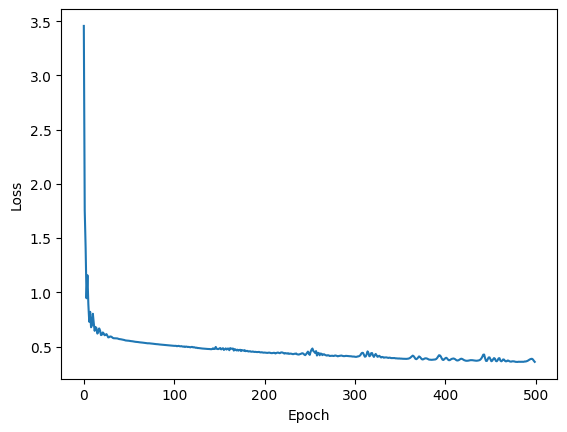

In [53]:
plt.plot(range(epochs), final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [57]:
### prediction in x_test data
predictions=[]
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_pred=model(data)
    predictions.append(y_pred.argmax().item())
    print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
0
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [60]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[92, 15],
       [15, 32]])

Text(95.72222222222221, 0.5, 'Predicted values')

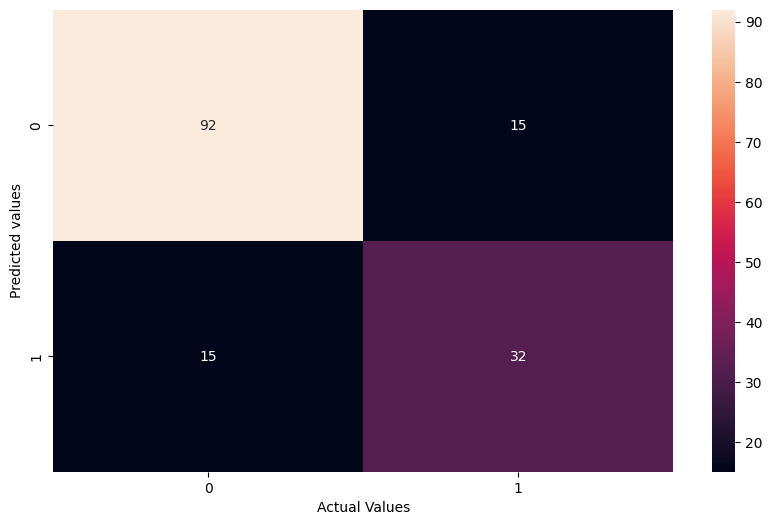

In [61]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')

In [62]:
from sklearn.metrics import accuracy_score

In [64]:
score=accuracy_score(y_test,predictions)
score

0.8051948051948052

In [65]:
### save the model
torch.save(model,'Diabetes.pt')

In [66]:
model=torch.load('Diabetes.pt')
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [67]:
## prediction of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [69]:
##new data inserted
list1=[6.0, 130.0, 72.0, 40.0, 0.0, 35.6, 0.627, 45.0]

In [70]:
new_data=torch.tensor(list1)

In [71]:
##predict new data using pytorch
with torch.no_grad():
  print(model(new_data))
  print(model(new_data).argmax().item())

tensor([1.0871, 1.5531])
1
